This codebase is messy and moderately big, with several issues that can be addressed through refactoring using OOP and dataclasses:

- The code is not modularized, with many functions and variables defined in the global scope.
- There is no clear separation of concerns, with data loading, preprocessing, modeling, and evaluation all mixed together.
- The code uses many magic numbers and hardcoded values, making it difficult to maintain and modify.
- The code does not follow the DRY (Don't Repeat Yourself) principle, with similar code repeated in multiple places.
- The code does not use dataclasses to store and manipulate data, making it difficult to work with the data.

You can refactor this codebase using OOP and dataclasses principles, such as:

- Creating classes to encapsulate data and behavior, such as a `DataLoader` class to load and preprocess the data, a `Model` class to train and evaluate the model, and a `FeatureImporter` class to calculate the feature importance.
- Using inheritance and polymorphism to create a hierarchy of classes that can be used to perform different tasks, such as training different types of models.
- Using encapsulation to hide implementation details and expose only the necessary interfaces, making the code more modular and reusable.
- Using abstraction to define interfaces and abstract classes that can be used to perform common tasks, such as data loading and preprocessing.
- Using dataclasses to store and manipulate data, making it easier to work with the data and reducing the amount of boilerplate code.

Mean squared error: 5.79


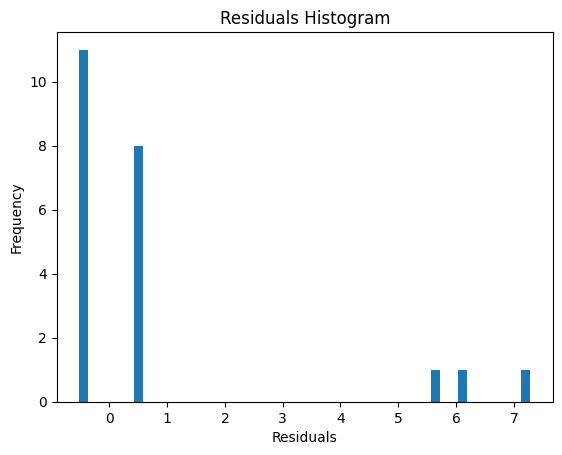

       feature  importance
1     feature2    2.596935
5   is_weekend    0.069645
4  hour_of_day    0.000000
3  day_of_week   -0.015145
0     feature1   -0.115164


In [5]:
# messy_code.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from dataclasses import dataclass
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("../data/data.csv")

# Define a function to preprocess data
def preprocess_data(data):
    data['date'] = pd.to_datetime(data['date'])
    data['day_of_week'] = data['date'].dt.dayofweek
    data['hour_of_day'] = data['date'].dt.hour
    data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
    data = data.drop(['date'], axis=1)  # Drop the 'date' column
    return data

# Preprocess data
data = preprocess_data(data)

# Define a function to split data into training and testing sets
def split_data(data, test_size=0.2, random_state=42):
    X = data.drop(['target'], axis=1)
    y = data['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Split data into training and testing sets
X_train, X_test, y_train, y_test = split_data(data)

# Define a function to train a linear regression model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Train a linear regression model
model = train_model(X_train, y_train)

# Define a function to make predictions
def make_predictions(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

# Make predictions
y_pred = make_predictions(model, X_test)

# Define a function to evaluate the model using mean squared error
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Evaluate the model
mse = evaluate_model(y_test, y_pred)
print(f'Mean squared error: {mse:.2f}')

# Define a function to plot the residuals
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.hist(residuals, bins=50)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Residuals Histogram')
    plt.show()

# Plot the residuals
plot_residuals(y_test, y_pred)

# Define a function to calculate the feature importance
def calculate_feature_importance(model, X_train):
    importances = model.coef_
    feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
    feature_importances.sort_values(by='importance', ascending=False, inplace=True)
    return feature_importances

# Calculate the feature importance
feature_importances = calculate_feature_importance(model, X_train)
print(feature_importances.head())

# Define a dataclass to store the data
@dataclass
class Data:
    X_train: pd.DataFrame
    X_test: pd.DataFrame
    y_train: pd.Series
    y_test: pd.Series

# Create an instance of the Data class
data = Data(X_train, X_test, y_train, y_test)

## Code Refactored using OOP

In [ ]:
# refactored_code.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from dataclasses import dataclass
import matplotlib.pyplot as plt

@dataclass
class Data:
    X_train: pd.DataFrame
    X_test: pd.DataFrame
    y_train: pd.Series
    y_test: pd.Series

class DataLoader:
    def __init__(self, file_path):
        self.file_path = file_path

    def load_data(self):
        data = pd.read_csv(self.file_path)
        return data

class DataPreprocessor:
    def __init__(self, data):
        self.data = data

    def preprocess_data(self):
        self.data['date'] = pd.to_datetime(self.data['date'])
        self.data['day_of_week'] = self.data['date'].dt.dayofweek
        self.data['hour_of_day'] = self.data['date'].dt.hour
        self.data['is_weekend'] = self.data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
        return self.data

class DataSplitter:
    def __init__(self, data, test_size=0.2, random_state=42):
        self.data = data
        self.test_size = test_size
        self.random_state = random_state

    def split_data(self):
        X = self.data.drop(['target'], axis=1)
        y = self.data['target']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        return Data(X_train, X_test, y_train, y_test)

class ModelTrainer:
    def __init__(self, data):
        self.data = data

    def train_model(self):
        model = LinearRegression()
        model.fit(self.data.X_train, self.data.y_train)
        return model

class ModelEvaluator:
    def __init__(self, model, data):
        self.model = model
        self.data = data

    def make_predictions(self):
        y_pred = self.model.predict(self.data.X_test)
        return y_pred

    def evaluate_model(self, y_pred):
        mse = mean_squared_error(self.data.y_test, y_pred)
        return mse

    def plot_residuals(self, y_pred):
        residuals = self.data.y_test - y_pred
        plt.hist(residuals, bins=50)
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title('Residuals Histogram')
        plt.show()

    def calculate_feature_importance(self):
        importances = self.model.coef_
        feature_importances = pd.DataFrame({'feature': self.data.X_train.columns, 'importance': importances})
        feature_importances.sort_values(by='importance', ascending=False, inplace=True)
        return feature_importances

# Load data
data_loader = DataLoader('data.csv')
data = data_loader.load_data()

# Preprocess data
data_preprocessor = DataPreprocessor(data)
data = data_preprocessor.preprocess_data()

# Split data into training and testing sets
data_splitter = DataSplitter(data)
data = data_splitter.split_data()

# Train a linear regression model
model_trainer = ModelTrainer(data)
model = model_trainer.train_model()

# Evaluate the model
model_evaluator = ModelEvaluator(model, data)
y_pred = model_evaluator.make_predictions()
mse = model_evaluator.evaluate_model(y_pred)
print(f'Mean squared error: {mse:.2f}')

# Plot the residuals
model_evaluator.plot_residuals(y_pred)

# Calculate the feature importance
feature_importances = model_evaluator.calculate_feature_importance()
print(feature_importances.head())

## Code Refactored Using FP

Note that in FP, we define small, pure functions that each perform a single task. We then compose these functions together to create a pipeline that performs the entire data science workflow. This makes the code more modular, reusable, and easier to test.

In [ ]:
# refactored_code_fp.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
load_data = lambda file_path: pd.read_csv(file_path)

# Preprocess data
preprocess_data = lambda data: (
    data.assign(date=pd.to_datetime(data['date']))
   .assign(day_of_week=lambda x: x['date'].dt.dayofweek)
   .assign(hour_of_day=lambda x: x['date'].dt.hour)
   .assign(is_weekend=lambda x: x['day_of_week'].apply(lambda y: 1 if y >= 5 else 0))
)

# Split data into training and testing sets
def split_data(data, test_size=0.2, random_state=42):
    X = data.drop(['target'], axis=1)
    y = data['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Train a linear regression model
train_model = lambda X_train, y_train: LinearRegression().fit(X_train, y_train)

# Make predictions
make_predictions = lambda model, X_test: model.predict(X_test)

# Evaluate the model using mean squared error
evaluate_model = lambda y_test, y_pred: mean_squared_error(y_test, y_pred)

# Plot the residuals
plot_residuals = lambda y_test, y_pred: (
    residuals = y_test - y_pred
    plt.hist(residuals, bins=50)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Residuals Histogram')
    plt.show()
)

# Calculate the feature importance
calculate_feature_importance = lambda model, X_train: (
    importances = model.coef_
    feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
    feature_importances.sort_values(by='importance', ascending=False, inplace=True)
    return feature_importances
)

# Pipeline
data = load_data('data.csv')
data = preprocess_data(data)
X_train, X_test, y_train, y_test = split_data(data)
model = train_model(X_train, y_train)
y_pred = make_predictions(model, X_test)
mse = evaluate_model(y_test, y_pred)
print(f'Mean squared error: {mse:.2f}')
plot_residuals(y_test, y_pred)
feature_importances = calculate_feature_importance(model, X_train)
print(feature_importances.head())